In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.weightstats import ztest

import math
import pandas as pd

In [2]:
data_msl = np.load("model_weights/assignments_msl_30_bs512_wind4.npy") #mean sea level pressure cluster
data_t2m = np.load("model_weights/assignments_t2m_30_bs512_wind4.npy") #2m temperature cluster
combined_data = np.vstack((data_msl, data_t2m)).T

timseries = np.load("data/timeseries.npy")

assigments = pd.DataFrame(combined_data,index=timseries,columns=['msl','t2m'])
assigments['year_month'] = assigments.index.to_period("M")

assigments.head()

,msl,t2m,year_month
1983-01-01 00:00:00,19,11,1983-01
1983-01-01 03:00:00,25,5,1983-01
1983-01-01 06:00:00,21,5,1983-01
1983-01-01 09:00:00,25,10,1983-01
1983-01-01 12:00:00,14,3,1983-01


In [3]:
# el nino data
url = "https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/detrend.nino34.ascii.txt"

elnino = pd.read_csv(url, sep="\s+")
elnino['datetime'] = pd.to_datetime(elnino['YR'].astype(int).astype(str) +\
                                     elnino['MON'].astype(int).astype(str), format='%Y%m')

elnino = elnino.set_index("datetime")[['ANOM']]
elnino.index=pd.to_datetime(elnino.index).to_period("M")

# anom = 0.5
anom = 1
elnino.loc[elnino['ANOM']>anom,'indicator'] = 1 #el nino
elnino.loc[elnino['ANOM']<-anom,'indicator'] = 2 #la nina
elnino['indicator'] = elnino['indicator'].fillna(0) #nothing

#join all 
elnino = assigments.join(elnino,on="year_month")
elnino.head(10)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\silla\AppData\Local\Temp\ipykernel_1708\3355551446.py:4: SyntaxWarning: invalid escape sequence '\s'
  elnino = pd.read_csv(url, sep="\s+")


,msl,t2m,year_month,ANOM,indicator
1983-01-01 00:00:00,19,11,1983-01,2.32,1.0
1983-01-01 03:00:00,25,5,1983-01,2.32,1.0
1983-01-01 06:00:00,21,5,1983-01,2.32,1.0
1983-01-01 09:00:00,25,10,1983-01,2.32,1.0
1983-01-01 12:00:00,14,3,1983-01,2.32,1.0
1983-01-01 15:00:00,25,3,1983-01,2.32,1.0
1983-01-01 18:00:00,21,3,1983-01,2.32,1.0
1983-01-01 21:00:00,24,9,1983-01,2.32,1.0
1983-01-02 00:00:00,24,17,1983-01,2.32,1.0
1983-01-02 03:00:00,19,5,1983-01,2.32,1.0


In [4]:
# bins = 10
# # plt.hist(clusters,label="All", histtype='step', bins=bins)
# plt.hist( elnino[elnino['indicator']==1]['cluster'],label="El Nino", histtype='step')
# plt.hist( elnino[elnino['indicator']==2]['cluster'],label="La Nina", histtype='step',bins=bins)
# plt.hist( elnino[elnino['indicator']==0]['cluster'],label="None", histtype='step',bins=bins)

# plt.xlabel('Cluster')
# plt.ylabel('Frequency')
# plt.title('Histogram of Clusters')
# plt.legend()
# plt.show()

In [5]:
# daily_data  = elnino.resample('D')[['cluster']].agg(lambda x: x.mode()[0])
# daily_data = daily_data.join(elnino['indicator'])

In [6]:
# daily_data['MONTH'] = daily_data.index.month
# daily_data_count = daily_data.groupby(['MONTH','indicator'])['cluster'].value_counts().unstack().fillna(0)
# daily_data_count

In [7]:
# fig, ax = plt.subplots(4,3,figsize=(20,12))

# for i in range(1,13):
#     daily_data_count.loc[i].T.replace(0,np.nan).dropna()\
#         .plot(kind='bar',
#               ax=ax[(i-1)//3,(i-1)%3],
#               stacked=False,
#               title=f'Month {i}')
    
#     ax[(i-1)//3,(i-1)%3].set_xlabel('')

# plt.show()

# # daily_data_count.loc[1].T.replace(0,np.nan).dropna().plot(kind='bar',stacked=False)

In [8]:
# bins = 10
# # plt.hist(clusters,label="All", histtype='step', bins=bins)
# plt.hist( daily_data[daily_data['indicator']==1]['cluster'],label="El Nino", histtype='step')
# plt.hist( daily_data[daily_data['indicator']==2]['cluster'],label="La Nina", histtype='step',bins=bins)
# plt.hist( daily_data[daily_data['indicator']==0]['cluster'],label="None", histtype='step',bins=bins)

# plt.xlabel('Cluster')
# plt.ylabel('Frequency')
# plt.title('Histogram of Clusters')
# plt.legend()
# plt.show()

In [9]:
# clusters = pd.DataFrame(clusters,index=timseries,columns=['Assigments'])
# prop_count = clusters.groupby(pd.Grouper(freq='M'))['Assigments'].value_counts().to_frame().unstack().fillna(0)

# blocks = 3
# fig, axs = plt.subplots(math.ceil(len(prop_count.columns) / blocks), blocks, figsize=(20, 25))  # Two columns of subplots

# for idx, col in enumerate(prop_count.columns):
#     row = idx // blocks
#     col_idx = idx % blocks
    
#     prop_count.rolling(12).mean()[col].dropna().plot(ax=axs[row, col_idx])
#     prop_count.rolling(12*5).mean()[col].dropna().plot(ax=axs[row, col_idx],secondary_y=True)
#     prop_count.rolling(12*10).mean()[col].dropna().plot(ax=axs[row, col_idx],secondary_y=True)
    
#     axs[row, col_idx].set_title(f'Cluster {idx}')
    
# plt.tight_layout()
# plt.show()

In [10]:
df = elnino.copy()
df['month'] = df.index.month
df['year'] = df.index.year
df['hour'] = df.index.hour
df['night'] = False
df.loc[df['hour'] < 8, 'night'] = True
df.loc[df['hour'] > 19, 'night']= True
# df.drop('hour', axis=1, inplace=True)

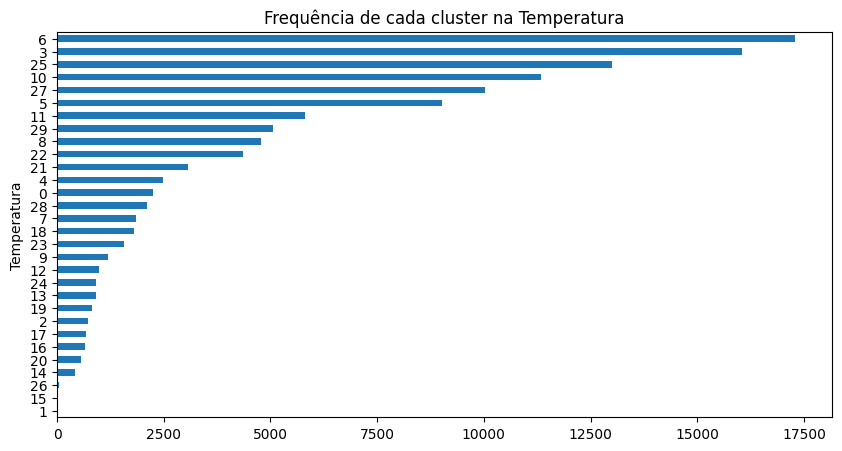

In [11]:
plt.figure(figsize=(10, 5))

df.groupby('t2m').count().sort_values('ANOM')['ANOM'].plot(kind='barh')

plt.ylabel('Temperatura')
plt.title('Frequência de cada cluster na Temperatura')
plt.show()

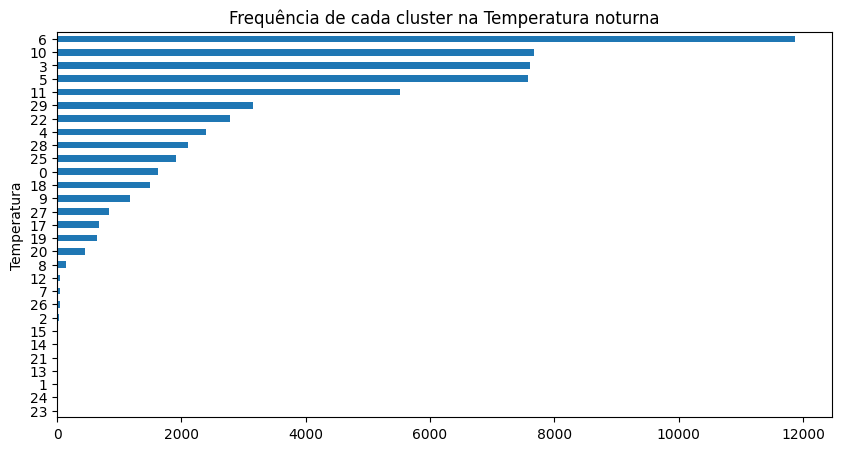

In [12]:
plt.figure(figsize=(10, 5))

df[df['night']].groupby('t2m').count().sort_values('ANOM')['ANOM'].plot(kind='barh')

plt.ylabel('Temperatura')
plt.title('Frequência de cada cluster na Temperatura noturna')
plt.show()

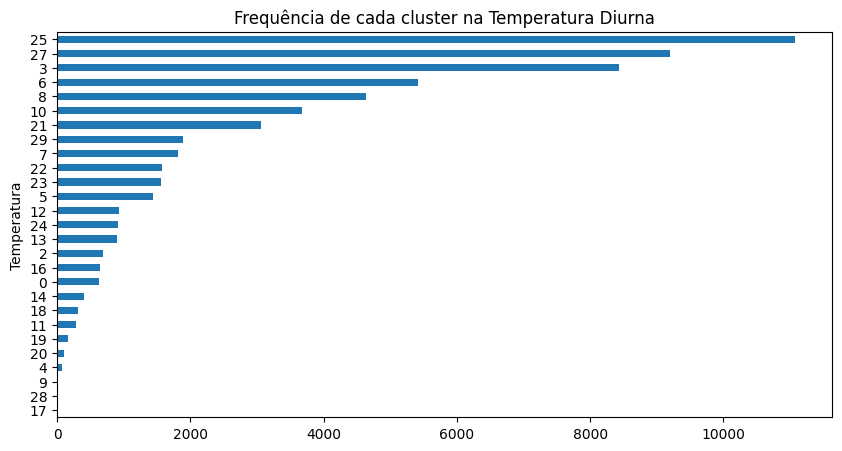

In [13]:
plt.figure(figsize=(10, 5))

df[~df['night']].groupby('t2m').count().sort_values('ANOM')['ANOM'].plot(kind='barh')

plt.ylabel('Temperatura')
plt.title('Frequência de cada cluster na Temperatura Diurna')
plt.show()

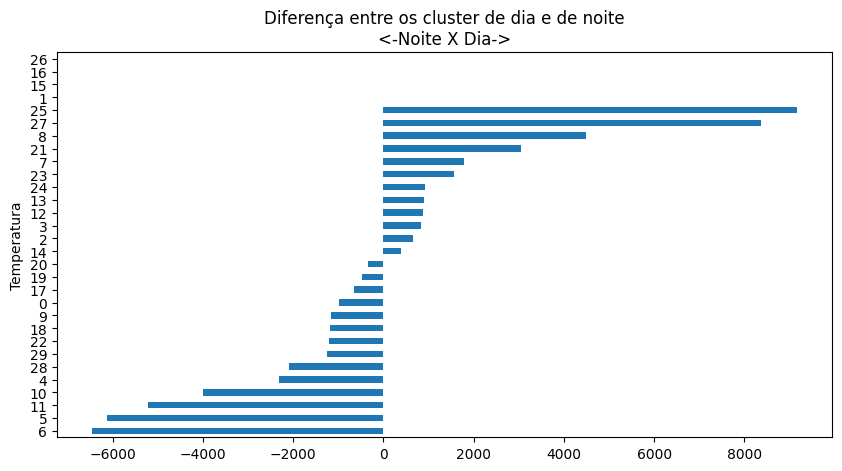

In [14]:
plt.figure(figsize=(10, 5))

diff = df[~df['night']].groupby('t2m').count().sort_values('ANOM')['ANOM'] - df[df['night']].groupby('t2m').count().sort_values('ANOM')['ANOM']
diff.sort_values().plot(kind='barh')

plt.ylabel('Temperatura')
plt.title('Diferença entre os cluster de dia e de noite\n<-Noite X Dia->')
plt.show()

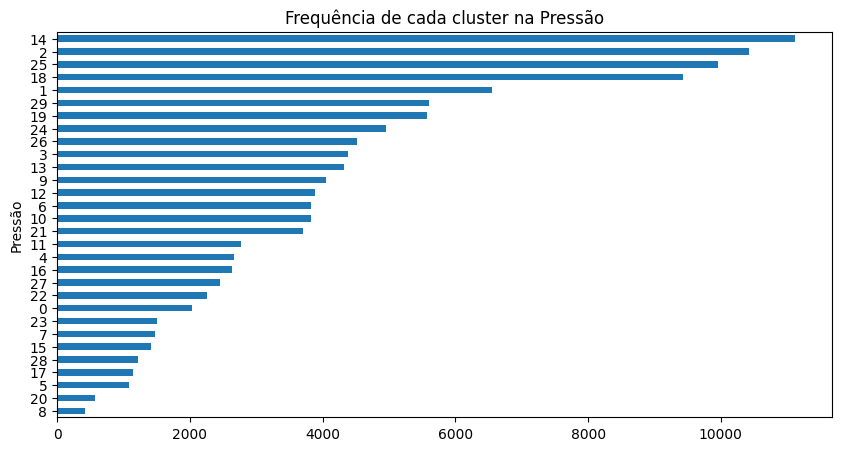

In [15]:
plt.figure(figsize=(10, 5))

df.groupby('msl').count().sort_values('ANOM')['ANOM'].plot(kind='barh')

plt.ylabel('Pressão')
plt.title('Frequência de cada cluster na Pressão')
plt.show()

In [16]:
clusters_list = [i for i in range(0, 30)]
indicators = [0, 1, 2]

n_rows = 5
n_cols = 6

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
# axes = axes.flatten()

for idx, cada_cluster in enumerate(clusters_list):
    # ax = axes[idx]
    df_tmp1 = df[df['t2m'] == cada_cluster]
    for indicator in indicators:
        df_tmp = df_tmp1[df_tmp1['indicator'] == indicator]
        df_tmp = df_tmp[['t2m', 'month']]
        df_tmp = df_tmp.groupby('month').count()
#         ax.plot(df_tmp, label=f'Indicator {indicator}')
#     ax.set_title(f'Cluster {cada_cluster}')

# plt.tight_layout()
# plt.show()

In [17]:
clusters_list = [i for i in range(0, 30)]
indicators = [0, 1, 2]

n_rows = 5
n_cols = 6

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
# axes = axes.flatten()

for idx, cada_cluster in enumerate(clusters_list):
    # ax = axes[idx]
    df_tmp1 = df[df['msl'] == cada_cluster]
    for indicator in indicators:
        df_tmp = df_tmp1[df_tmp1['indicator'] == indicator]
        df_tmp = df_tmp[['msl', 'month']]
        df_tmp = df_tmp.groupby('month').count()
    #     ax.plot(df_tmp, label=f'Indicator {indicator}')
    # ax.set_title(f'Cluster {cada_cluster}')

# plt.tight_layout()
# plt.show()

In [18]:
# 0 Nomral, 1 El Nino, 2 La Nina
months = df[['year_month', 'indicator']].drop_duplicates().reset_index(drop=True)

In [19]:
temp_freq = df.value_counts(['t2m', 'year_month']).sort_index().reset_index()
press_freq = df.value_counts(['msl', 'year_month']).sort_index().reset_index()

In [20]:
temp_freq.head()

,t2m,year_month,count
0,0,1983-01,2
1,0,1983-02,6
2,0,1983-10,22
3,0,1984-01,3
4,0,1984-02,9


In [21]:
months.value_counts('indicator')

indicator
0.0    377
1.0     61
2.0     54
Name: count, dtype: int64

In [22]:
temp_freq = temp_freq.merge(months, on='year_month')
press_freq = press_freq.merge(months, on='year_month')

In [23]:
freq_data = pd.DataFrame(columns=['type', 'cluster', 'indicator', 'mean_freq_per_month', 'total_count'])

In [24]:
print('-------------Temperatura-------------')
for cada_cluster in clusters_list:
    df_temp = temp_freq[temp_freq['t2m'] == cada_cluster]
    normal = df_temp[df_temp['indicator'] == 0]
    elnino = df_temp[df_temp['indicator'] == 1]
    lanina = df_temp[df_temp['indicator'] == 2]

    normal_m = normal['count'].sum()/len(normal)
    elnino_m = elnino['count'].sum()/len(elnino)
    lanina_m = lanina['count'].sum()/len(lanina)

    freq_data.loc[len(freq_data)] = ['t2m', cada_cluster, '0', normal_m, normal['count'].sum()]
    freq_data.loc[len(freq_data)] = ['t2m', cada_cluster, '1', elnino_m, elnino['count'].sum()]
    freq_data.loc[len(freq_data)] = ['t2m', cada_cluster, '2', lanina_m, lanina['count'].sum()]

    # print(f'Frequência média Cluster {cada_cluster}:')
    # print(f'normal: {normal_m}\tel nino: {elnino_m}\tla nina: {lanina_m}')

-------------Temperatura-------------


C:\Users\silla\AppData\Local\Temp\ipykernel_1708\793429067.py:10: RuntimeWarning: invalid value encountered in scalar divide
  lanina_m = lanina['count'].sum()/len(lanina)


In [25]:
print('-------------Pressão-------------')
for cada_cluster in clusters_list:
    df_temp = press_freq[press_freq['msl'] == cada_cluster]
    normal = df_temp[df_temp['indicator'] == 0]
    elnino = df_temp[df_temp['indicator'] == 1]
    lanina = df_temp[df_temp['indicator'] == 2]

    normal_m = normal['count'].sum()/len(normal)
    elnino_m = elnino['count'].sum()/len(elnino)
    lanina_m = lanina['count'].sum()/len(lanina)
    
    freq_data.loc[len(freq_data)] = ['msl', cada_cluster, '0', normal_m, normal['count'].sum()]
    freq_data.loc[len(freq_data)] = ['msl', cada_cluster, '1', elnino_m, elnino['count'].sum()]
    freq_data.loc[len(freq_data)] = ['msl', cada_cluster, '2', lanina_m, lanina['count'].sum()]

    # print(f'Frequência média Cluster {cada_cluster}:')
    # print(f'normal: {normal_m}\tel nino: {elnino_m}\tla nina: {lanina_m}')

-------------Pressão-------------


In [26]:
freq_data

,type,cluster,indicator,mean_freq_per_month,total_count
0,t2m,0,0,12.105634,1719
1,t2m,0,1,11.000000,319
2,t2m,0,2,9.590909,211
3,t2m,1,0,1.000000,9
4,t2m,1,1,1.000000,2
...,...,...,...,...,...
175,msl,28,1,5.909091,65
176,msl,28,2,10.538462,137
177,msl,29,0,13.184438,4575
178,msl,29,1,9.407407,508
